In [1]:
# cell 1: imports & load
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv(r"C:\Users\91902\OneDrive\Desktop\smart_premium\train.csv")
test  = pd.read_csv(r"C:\Users\91902\OneDrive\Desktop\smart_premium\test.csv")
sample = pd.read_csv(r"C:\Users\91902\OneDrive\Desktop\smart_premium\sample_submission.csv")

print("train:", train.shape, "test:", test.shape, "sample:", sample.shape)
train.head()


train: (1200000, 21) test: (800000, 20) sample: (800000, 2)


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [2]:
test.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House


In [3]:
sample.head()

,id,Premium Amount
0,1200000,1102.545
1,1200001,1102.545
2,1200002,1102.545
3,1200003,1102.545
4,1200004,1102.545


In [4]:
print(train.isnull().sum())

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64


In [5]:
print(train.describe())

                 id           Age  Annual Income  Number of Dependents  \
count  1.200000e+06  1.181295e+06   1.155051e+06          1.090328e+06   
mean   5.999995e+05  4.114556e+01   3.274522e+04          2.009934e+00   
std    3.464103e+05  1.353995e+01   3.217951e+04          1.417338e+00   
min    0.000000e+00  1.800000e+01   1.000000e+00          0.000000e+00   
25%    2.999998e+05  3.000000e+01   8.001000e+03          1.000000e+00   
50%    5.999995e+05  4.100000e+01   2.391100e+04          2.000000e+00   
75%    8.999992e+05  5.300000e+01   4.463400e+04          3.000000e+00   
max    1.199999e+06  6.400000e+01   1.499970e+05          4.000000e+00   

       Health Score  Previous Claims   Vehicle Age  Credit Score  \
count  1.125924e+06    835971.000000  1.199994e+06  1.062118e+06   
mean   2.561391e+01         1.002689  9.569889e+00  5.929244e+02   
std    1.220346e+01         0.982840  5.776189e+00  1.499819e+02   
min    2.012237e+00         0.000000  0.000000e+00  3.000000e

In [6]:
print(test.isnull().sum())

id                           0
Age                      12489
Gender                       0
Annual Income            29860
Marital Status           12336
Number of Dependents     73130
Education Level              0
Occupation              239125
Health Score             49449
Location                     0
Policy Type                  0
Previous Claims         242802
Vehicle Age                  3
Credit Score             91451
Insurance Duration           2
Policy Start Date            0
Customer Feedback        52276
Smoking Status               0
Exercise Frequency           0
Property Type                0
dtype: int64


In [7]:
print(test.describe())


                 id            Age  Annual Income  Number of Dependents  \
count  8.000000e+05  787511.000000  770140.000000         726870.000000   
mean   1.600000e+06      41.136440   32803.871471              2.009337   
std    2.309403e+05      13.537829   32201.063749              1.415241   
min    1.200000e+06      18.000000       2.000000              0.000000   
25%    1.400000e+06      30.000000    8048.000000              1.000000   
50%    1.600000e+06      41.000000   23981.000000              2.000000   
75%    1.799999e+06      53.000000   44660.000000              3.000000   
max    1.999999e+06      64.000000  149997.000000              4.000000   

        Health Score  Previous Claims    Vehicle Age   Credit Score  \
count  750551.000000    557198.000000  799997.000000  708549.000000   
mean       25.613036         1.004873       9.571891     592.904749   
std        12.206882         0.982803       5.772200     150.116374   
min         1.646561         0.000000   

In [8]:
print(sample.isnull().sum())

id                0
Premium Amount    0
dtype: int64


In [9]:
print(sample.describe())


                 id  Premium Amount
count  8.000000e+05    8.000000e+05
mean   1.600000e+06    1.102545e+03
std    2.309403e+05    1.347349e-08
min    1.200000e+06    1.102545e+03
25%    1.400000e+06    1.102545e+03
50%    1.600000e+06    1.102545e+03
75%    1.799999e+06    1.102545e+03
max    1.999999e+06    1.102545e+03


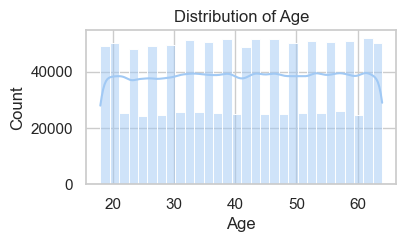

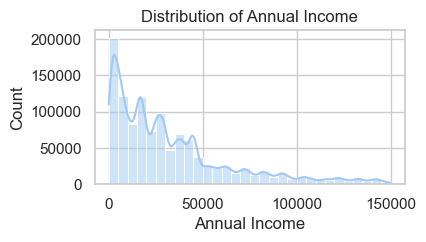

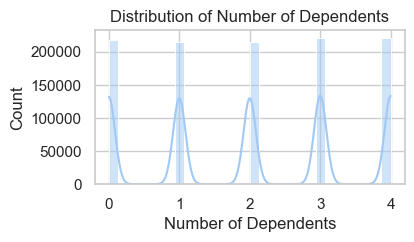

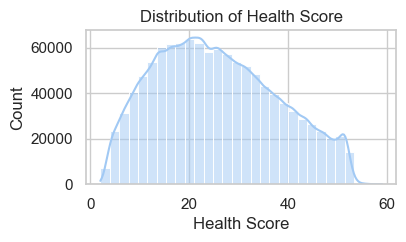

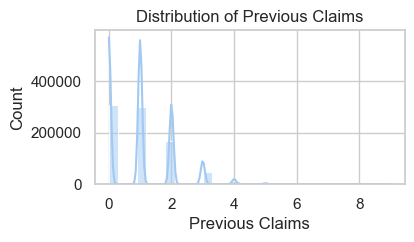

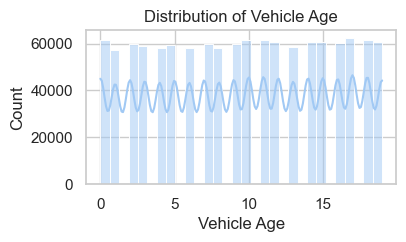

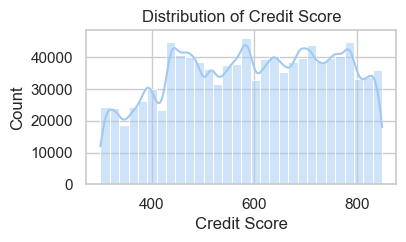

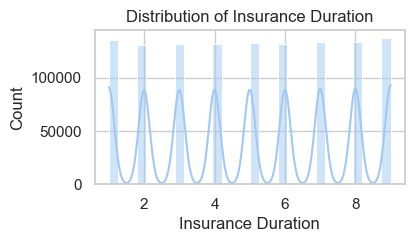

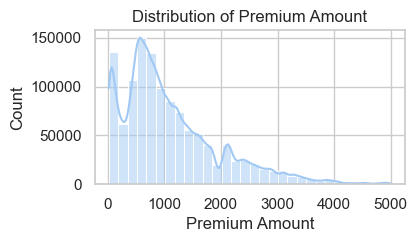

In [10]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid", palette="pastel")

# ------------------------------
# 1. Distribution of numerical features
# ------------------------------
num_cols = ["Age", "Annual Income", "Number of Dependents",
            "Health Score", "Previous Claims", "Vehicle Age",
            "Credit Score", "Insurance Duration", "Premium Amount"]

for col in num_cols:
    plt.figure(figsize=(4,2))
    sns.histplot(train[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


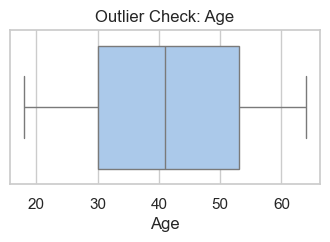

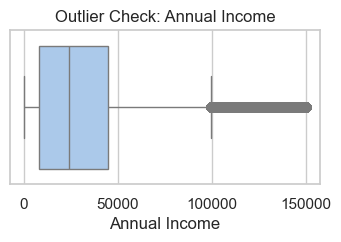

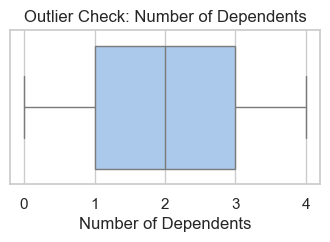

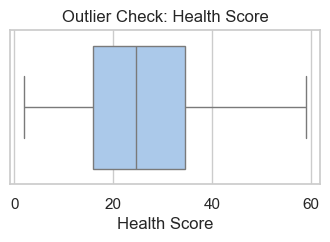

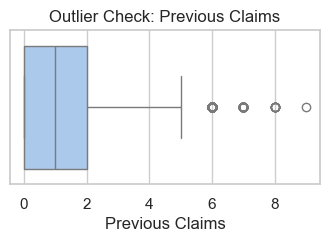

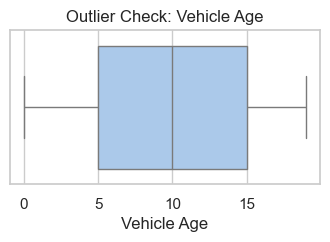

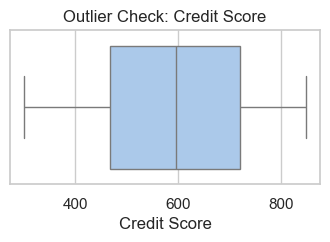

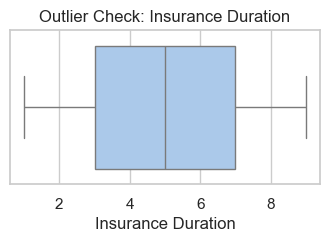

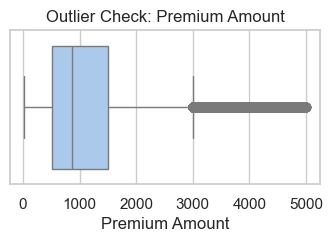

In [11]:
# 2. Boxplots for outlier detection
# ------------------------------
for col in num_cols:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=train[col])
    plt.title(f"Outlier Check: {col}")
    plt.show()



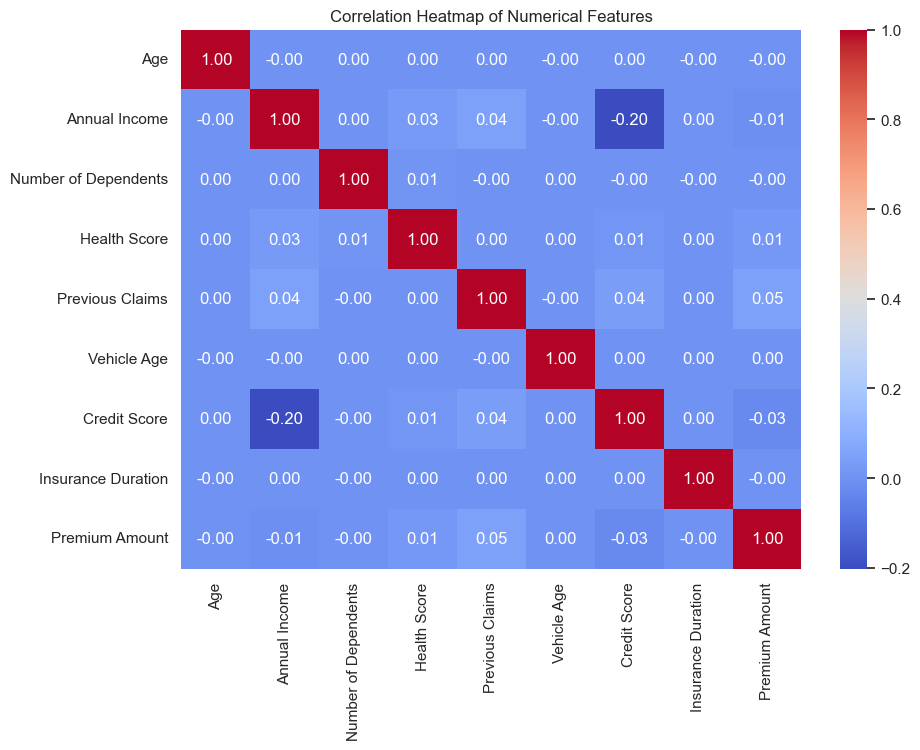

In [12]:
# 3. Correlation Heatmap
# ------------------------------
plt.figure(figsize=(10,7))
corr = train[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


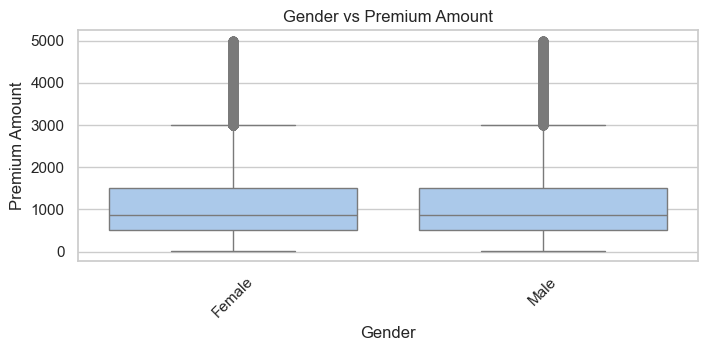

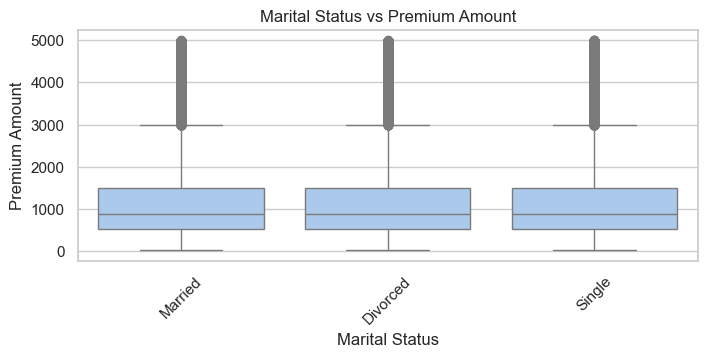

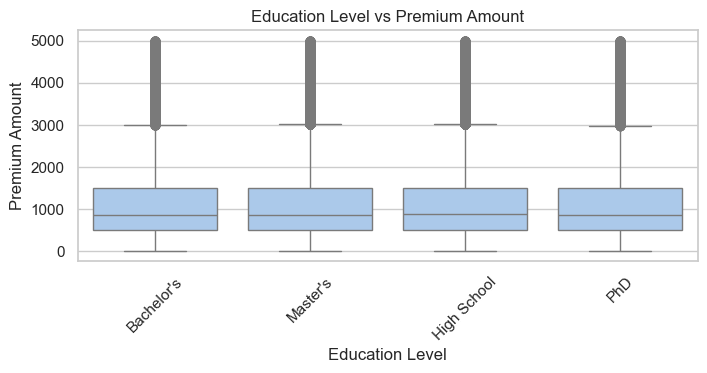

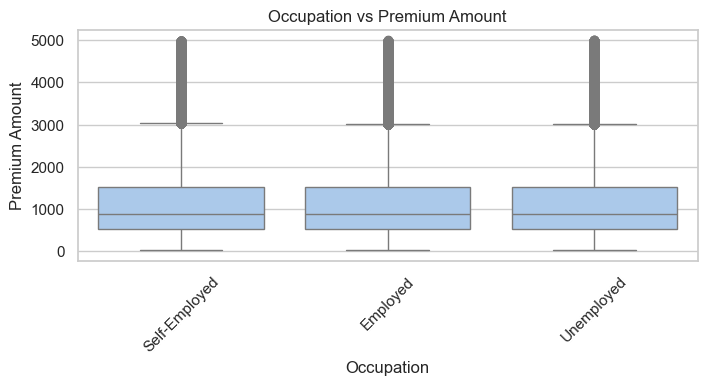

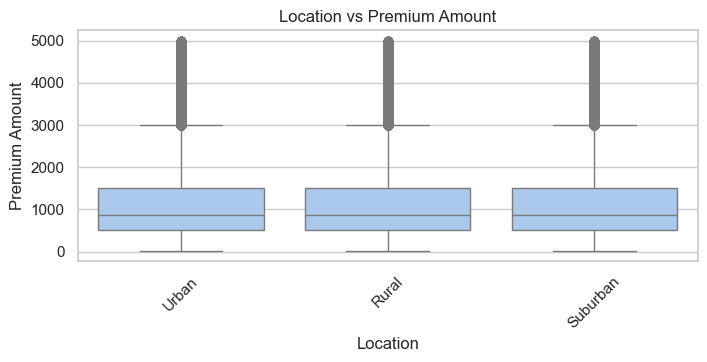

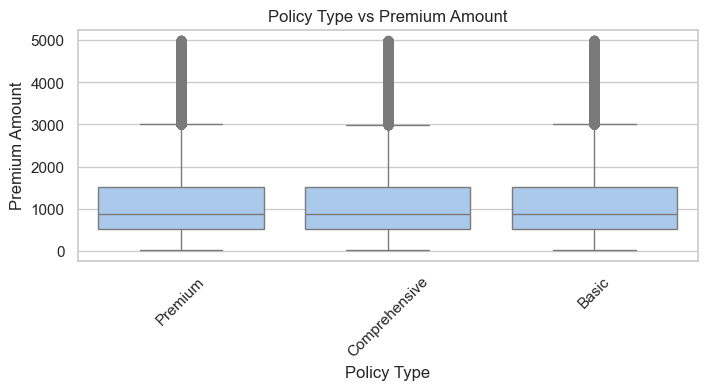

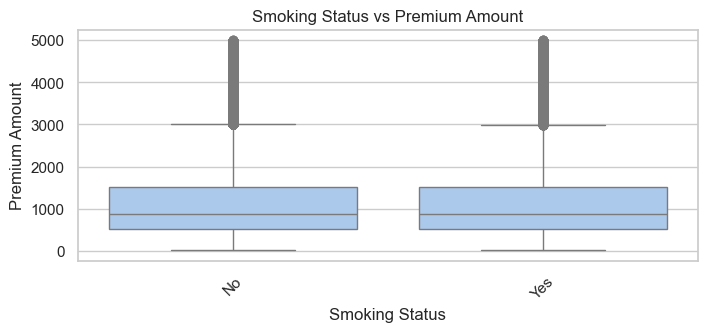

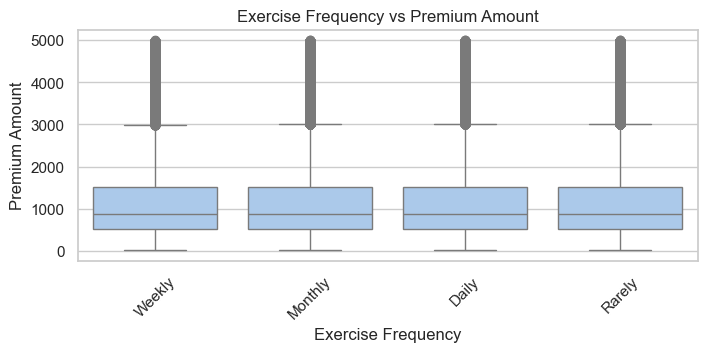

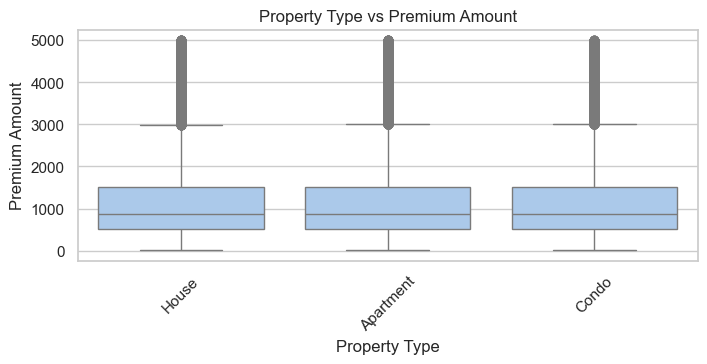

In [13]:
# 4. Categorical features vs Premium
# ------------------------------
cat_cols = ["Gender", "Marital Status", "Education Level", 
            "Occupation", "Location", "Policy Type", 
            "Smoking Status", "Exercise Frequency", "Property Type"]

for col in cat_cols:
    plt.figure(figsize=(8,3))
    sns.boxplot(x=col, y="Premium Amount", data=train)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Premium Amount")
    plt.show()
